In [6]:
#imports

import json
import urllib.request
import pandas as pd


# url = 'https://data.boston.gov/api/3/action/datastore_search?resource_id=4b99718b-d064-471b-9b24-517ae5effecc'
# import data sets for 2022 and 2021
url2022='https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/4b99718b-d064-471b-9b24-517ae5effecc/download/fy2022pa-4.csv'  
url2021='https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/c4b7331e-e213-45a5-adda-052e4dd31d41/download/data2021-full.csv'
# fileobj = urllib.request.urlopen(url)
# response_dict = json.loads(fileobj.read())
# data=response_dict["result"]
# print(response_dict["result"])


#import building inventory 
buildinginventory='https://data.boston.gov/dataset/f2a82340-1f9c-49fb-a60b-b5655c9a7931/resource/391a32e6-d4bb-48d3-a990-cb35a5768a40/download/building_inventory_021020.csv'
buildinginventorydf=pd.read_csv(buildinginventory)
#rename building inventory columns with prefix bi_ to distinguish when joining
buildinginventorycolumns=buildinginventorydf.columns
# print(buildinginventorycolumns)
buildinginventorycolumns=["bi_"+x for x in buildinginventorycolumns]
buildinginventorydf.columns=buildinginventorycolumns
# buildinginventorydf1=buildinginventorydf.drop_duplicates(subset=['bi_pid_long'])
print(len(buildinginventorydf))
buildinginventorydf1=buildinginventorydf.copy()
buildinginventorydf1=buildinginventorydf1.dropna(subset=["bi_pid_long"])
print(len(buildinginventorydf1))
buildinginventorydf1=buildinginventorydf1[~buildinginventorydf1["bi_pid_long"].str.contains('[A-Za-z]',na=False)]
buildinginventorydf1["bi_pid_long"]=buildinginventorydf1["bi_pid_long"].astype(int,errors="ignore")
buildinginventorydf1["bi_pid_long"]=buildinginventorydf1["bi_pid_long"].astype(str)
# for each file, merge with building inventory and add to list
framelist=[[url2022,'2022'],[url2021,'2021']]
dflist=[]
for frame in framelist:
  df=pd.read_csv(frame[0])
  df["filename"]=frame[1]
  df["PID"]=df["PID"].astype(str)
  
  df=df.merge(buildinginventorydf1, left_on='PID', right_on="bi_pid_long",how='left')
  dflist.append(df)


# select 2022 file for regression
df1=dflist[0]


# filter to single family owner occ
# df2=df1[((df1["LU_DESC"]=="SINGLE FAM DWELLING") |(df1["LU_DESC"]=="RESIDENTIAL CONDO"))&(df1["OWN_OCC"]=="Y")]
df2=df1[((df1["LU_DESC"]=="SINGLE FAM DWELLING"))&(df1["OWN_OCC"]=="Y")]
print(len(df2))
# df1.groupby(by="LU_DESC")["LU_DESC"].count().reset_index(name="LU_DESC_count").sort_values(by="LU_DESC_count",ascending=False)

# calculate number of na rows for 2022 assessment data set
df2_na_stats=pd.DataFrame(df2.isnull().sum()/len(df2))
df2_na_stats.to_csv("na_counts2.csv")
df2_na_stats


##download csv to local
# from google.colab import files
# files.download("masterrenolist.csv")


# # # read in remodel df
# import pandas as pd
# import ast
# remodeldf=pd.read_csv("/content/masterrenolist.csv")

# # bring in historical remodel data
# remodeldf["years"]=remodeldf["1"].apply(lambda x: ast.literal_eval(x))
# listcol=remodeldf["years"].to_list()
# lens=[len(x) for x in listcol]
# lens

# remodeldf["remodelcount"]=lens
# remodeldf

# listcol=remodeldf["years"].to_list()
# maxlist=[max(x,default=0) for x in listcol]

# remodeldf["latestremodel"]=maxlist
# remodeldf["0"]=remodeldf["0"].astype(str)

# df3=df2.merge(remodeldf, left_on='PID', right_on="0",how='left')

# # change types on some fields

# retype=["TOTAL_VALUE","BLDG_VALUE","LAND_VALUE","GROSS_TAX"]
# for r in retype:
#   print(r)
#   df3[r]=df3[r].str.replace(",","").str.replace("$","").astype(float)


# # select numeric fields only
# pd.set_option("display.max_columns", None)
# numcolumns=df3.select_dtypes(include=["float","int"])
# numcolumns



# # read in remodel df
import pandas as pd
import ast
remodeldf=pd.read_csv("masterrenolist.csv")

# bring in historical remodel data
remodeldf["years"]=remodeldf["1"].apply(lambda x: ast.literal_eval(x))
listcol=remodeldf["years"].to_list()
lens=[len(x) for x in listcol]
lens

remodeldf["remodelcount"]=lens
remodeldf

listcol=remodeldf["years"].to_list()
maxlist=[max(x,default=0) for x in listcol]

remodeldf["latestremodel"]=maxlist
remodeldf["0"]=remodeldf["0"].astype(str)

df3=df2.merge(remodeldf, left_on='PID', right_on="0",how='left')

# change types on some fields

retype=["TOTAL_VALUE","BLDG_VALUE","LAND_VALUE","GROSS_TAX"]
for r in retype:
  print(r)
  df3[r]=df3[r].str.replace(",","").str.replace("$","").astype(float)


# select numeric fields only
pd.set_option("display.max_columns", None)
numcolumns=df3.select_dtypes(include=["float","int"])
numcolumns

/var/folders/j0/ynr213yd3xv8z6ky7v66rpn40000gn/T/ipykernel_6352/1718435675.py:20: DtypeWarning: Columns (1,40,44,47,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  buildinginventorydf=pd.read_csv(buildinginventory)


98930
98911
25640
TOTAL_VALUE
BLDG_VALUE
LAND_VALUE
GROSS_TAX


/var/folders/j0/ynr213yd3xv8z6ky7v66rpn40000gn/T/ipykernel_6352/1718435675.py:131: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3[r]=df3[r].str.replace(",","").str.replace("$","").astype(float)


GIS_ID  ZIPCODE  BLDG_SEQ  NUM_BLDGS  LUC  RES_FLOOR  CD_FLOOR  \
0      1.000210e+08     2128       1.0          1  101        2.0       NaN   
1      1.000270e+08     2128       1.0          1  101        2.0       NaN   
2      1.000330e+08     2128       1.0          1  101        1.5       NaN   
3      1.000520e+08     2128       1.0          1  101        2.0       NaN   
4      1.001180e+08     2128       1.0          1  101        2.0       NaN   
...             ...      ...       ...        ...  ...        ...       ...   
25635  2.205658e+09     2135       1.0          1  101        2.0       NaN   
25636  2.205660e+09     2135       1.0          1  101        2.0       NaN   
25637  2.205662e+09     2135       1.0          1  101        2.0       NaN   
25638  2.205663e+09     2135       1.0          1  101        2.0       NaN   
25639  2.205663e+09     2135       1.0          1  101        2.0       NaN   

       RES_UNITS  COM_UNITS  RC_UNITS  LAND_SF  GROSS_AREA  LIVING_AREA  \
0              0          0         0   1238.0      1836.0       1122.0   
1              0          0         0   1650.0      3076.0       1968.0   
2              0          0         0   2500.0      1920.6       1110.6   
3              0          0         0   1618.0      2476.0       1648.0   
4              0          0         0   1606.0      2781.0       1798.0   
...          ...        ...       ...      ...         ...          ...   
25635          0          0         0   4001.0      2522.0       1562.0   
25636          0          0         0   6441.0      2906.0       1612.0   
25637          0          0         0   4305.0      3927.6       2301.6   
25638          0          0         0   3553.0      3619.2       2347.2   
25639          0          0         0   3778.0      3660.4       2390.4   

       LAND_VALUE  BLDG_VALUE  TOTAL_VALUE  GROSS_TAX  YR_BUILT  YR_REMODEL  \
0        155800.0    210500.0     366300.0    3985.34    1910.0      1965.0   
1        172500.0    328400.0     500900.0    5449.79    1900.0      1980.0   
2        201800.0    301800.0     503600.0    5479.17    1920.0         NaN   
3        170200.0    511900.0     682100.0    7421.25    1900.0      2017.0   
4        164900.0    370100.0     535000.0    5820.80    1905.0      1996.0   
...           ...         ...          ...        ...       ...         ...   
25635    255400.0    451000.0     706400.0    7685.63    1920.0      2003.0   
25636    308500.0    520300.0     828800.0    9017.34    1920.0      1991.0   
25637    271700.0    716900.0     988600.0   10755.97    1910.0      2017.0   
25638    252800.0    536600.0     789400.0    8588.67    1920.0         NaN   
25639    260100.0    569100.0     829200.0    9021.69    1920.0         NaN   

       BED_RMS  FULL_BTH  HLF_BTH  KITCHEN  TT_RMS  FIRE_PLACE  NUM_PARKING  \
0            3         1        0        1       5           0            0   
1            4         1        1        1       8           0            0   
2            4         1        1        1       9           0            0   
3            3         1        1        1       5           0            0   
4            4         2        1        2       8           0            2   
...        ...       ...      ...      ...     ...         ...          ...   
25635        3         1        1        1       6           0            2   
25636        4         2        0        1       8           0            3   
25637        4         2        1        1       7           2            2   
25638        4         1        1        1       9           1            2   
25639        7         2        1        1      10           2            3   

         bi_id  bi_cm_id  bi_unit_num  bi_zipcode  bi_yr_built  bi_land_sf  \
0      17292.0       NaN          NaN      2128.0       1910.0      1238.0   
1      66829.0       NaN          NaN      2128.0       1900.0      1650.0   
2      13723.0       NaN       

In [2]:
#train test split
from sklearn.model_selection import train_test_split

import numpy as np
dcols=list(df3.columns)
dcols
# dcols[dcols.index("bi_units_res"):dcols.index("bi_existing_shw")]
# dcols[dcols.index("bi_last_major_renovation_date"):dcols.index("bi_onsite_renewable_kwh")]
# dcols[dcols.index("Unnamed: 0"):dcols.index("years")]
df3["remodeled"]=np.where(df3['latestremodel']!= '[]', True, False)
df3


# df3["TOTAL_VALUE"]=df3["TOTAL_VALUE"].str.replace(",","").astype(int)
df3todrop=["YR_REMODEL","ZIPCODE","BLDG_TYPE","CITY","ST_NAME","PID","GIS_ID","CM_ID","ST_NUM","UNIT_NUM","BLDG_SEQ","NUM_BLDGS","LUC","LU",
           "LU_DESC","OWN_OCC","OWNER","MAIL_ADDRESSEE","MAIL_ADDRESS","MAIL_CITY",
           "MAIL_STATE","MAIL_ZIPCODE","TOTAL_VALUE","CD_FLOOR","RES_UNITS","COM_UNITS","RC_UNITS",
           "GROSS_TAX","TOTAL_VALUE","BLDG_VALUE","STRUCTURE_CLASS","CORNER_UNIT","filename",
           "bi_id","bi_cm_id","bi_pid_long","bi_building_typology","bi_use_class","bi_st_num",
           "bi_st_name","bi_st_name_suf","bi_unit_num","bi_zipcode","bi_yr_built",
           'bi_yr_built','bi_land_sf','bi_gross_area','bi_living_area','bi_sqft','bi_num_floors',
           'bi_num_bldgs','bi_units_res',"bi_onsite_renewable_kwh","years","latestremodel","BDRM_COND","KITCHEN_STYLE2","KITCHEN_STYLE3","ORIENTATION","bi_existing_shw","bi_census_tract_number"]
#other columns to drop
drop1=dcols[dcols.index("bi_units_res"):dcols.index("bi_existing_shw")]
drop2=dcols[dcols.index("bi_last_major_renovation_date"):dcols.index("bi_onsite_renewable_kwh")]
drop3=dcols[dcols.index("Unnamed: 0"):dcols.index("years")]
drop4=['bi_building_subtypology', 'bi_sqft_class', 'bi_year_built_class',
       'bi_historic_district', 'bi_landmark', 'bi_flood', 'bi_stormwater',
       'bi_ct_pop_disability', 'bi_ct_pop_children_under_5',
       'bi_ct_pop_over_65', 'bi_ct_pop_low_to_no_income',
       'bi_ct_pop_limited_english_proficiency', 'bi_ct_pop_poc',
       'bi_ct_pop_med_illness', 'bi_ct_perc_disability',
       'bi_ct_perc_children_under_5', 'bi_ct_perc_over_65',
       'bi_ct_perc_low_to_no_income', 'bi_ct_perc_limited_english_proficiency',
       'bi_ct_perc_poc', 'bi_ct_perc_med_illness',
       'bi_ct_hh_income_200000_or_more', 'bi_ct_perc_income_200000_or_more',
       'bi_cashp_only', 'bi_cashp_and_elec_upgrade', 'bi_cashp_outdoor',
       'bi_dashp_only', 'bi_dashp_and_elec_upgrade', 'bi_dashp_outdoor',
       'bi_gshp_only', 'bi_gshp_and_elec_upgrade', 'bi_vrf_only',
       'bi_vrf_and_elec_upgrade', 'bi_awhp_only', 'bi_awhp_and_elec_upgrade',
       'bi_hp_recommendation_count', 'bi_insulate_attic',
       'bi_insulate_attic_converted', 'bi_ext_roof_insulation',
       'bi_insulate_exposed_ducts', 'bi_insulate_exposed_pipes',
       'bi_interior_wall_insulation_blow_in',
       'bi_exterior_wall_insulation_at_replacement',
       'bi_exterior_wall_insulation', 'bi_interior_wall_insulation_board',
       'bi_insulate_spandrel', 'bi_asbestos', 'bi_seal_elevator_vent_shafts',
       'bi_env_recommendation_count']
fdrop=df3todrop+drop1+drop2+drop3+drop4
len(fdrop)


# drop properties over $3MM and select target field
print(df3.shape)
df3=df3[df3["BLDG_VALUE"]<=3000000]
X=df3[df3["BLDG_VALUE"]<=3000000]
X=X.drop(fdrop,axis=1)
Xcheck=X.columns
print(Xcheck)
Y=df3["BLDG_VALUE"]

# X["ZIPCODE"]=X["ZIPCODE"].astype(str)
# X["bi_census_tract_number"]=X["bi_census_tract_number"].astype(str)
# X["LAND_VALUE"]=X["LAND_VALUE"].str.replace(",","").astype(int)

# set columns into lists based on types to perform one hot encoding and then put back together
Xpre=X.select_dtypes(include=['object']).columns.tolist()

Xprenot=X.select_dtypes(exclude=['object']).columns.tolist()
print(Xprenot)
xnums=X[Xprenot]
xcats=X[Xpre]

X1=xcats
X1hot=pd.get_dummies(X1, prefix=Xpre,drop_first=True)


X=pd.concat([X1hot,xnums],axis=1)

# X=X1hot

# perform train test split on one hot encoded data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, train_size=.8,test_size=.2,random_state=1)


# replacing null values with mode for numeric columns
nulls=pd.DataFrame(X_train.isnull().sum()/len(X_train))
nullslist=nulls[nulls[0]!=0].index.values.tolist()
for item in nullslist:
    X_train[item].fillna(X_train[item].mode()[0], inplace=True)

nulls=pd.DataFrame(X_test.isnull().sum()/len(X_test))
nullslist=nulls[nulls[0]!=0].index.values.tolist()
for item in nullslist:
    X_test[item].fillna(X_test[item].mode()[0], inplace=True)


# standard scaling df
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
X_trainstandard = scalerX.transform(X_train)
X_teststandard = scalerX.transform(X_test)

print(X_train.shape)


# minmax scaling df
from sklearn.preprocessing import MinMaxScaler
scalerminmaxX = MinMaxScaler().fit(X_train)
X_trainminmax = scalerminmaxX.transform(X_train)
X_testminmax = scalerminmaxX.transform(X_test)

print(X_train.shape)


# maxabs scaling df
from sklearn.preprocessing import MaxAbsScaler
scalermaxabsX = MaxAbsScaler().fit(X_train)
X_trainmaxabs = scalermaxabsX.transform(X_train)
X_testmaxabs = scalermaxabsX.transform(X_test)

print(X_train.shape)


# robust scaling df
from sklearn.preprocessing import RobustScaler
scalerrbustX = RobustScaler().fit(X_train)
X_trainrobust = scalerrbustX.transform(X_train)
X_testrobust = scalerrbustX.transform(X_test)

print(X_train.shape)

# place all scaled values into set to do training loops
sets=[[X_train,X_test,"No Transform"],[X_trainstandard,X_teststandard,"Standard Transform"],[X_trainminmax,X_testminmax, "MinMaxTransform"],[X_trainmaxabs,X_testmaxabs, "Max Absolute Transform"]]


(25640, 179)
Index(['RES_FLOOR', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE',
       'YR_BUILT', 'ROOF_STRUCTURE', 'ROOF_COVER', 'INT_WALL', 'EXT_FINISHED',
       'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BED_RMS', 'FULL_BTH',
       'HLF_BTH', 'KITCHEN', 'TT_RMS', 'BTHRM_STYLE1', 'BTHRM_STYLE2',
       'BTHRM_STYLE3', 'KITCHEN_TYPE', 'KITCHEN_STYLE1', 'HEAT_TYPE',
       'HEAT_FUEL', 'AC_TYPE', 'FIRE_PLACE', 'NUM_PARKING', 'PROP_VIEW',
       'remodelcount', 'remodeled'],
      dtype='object')
['RES_FLOOR', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'YR_BUILT', 'BED_RMS', 'FULL_BTH', 'HLF_BTH', 'KITCHEN', 'TT_RMS', 'FIRE_PLACE', 'NUM_PARKING', 'remodelcount', 'remodeled']
(20412, 83)
(20412, 83)
(20412, 83)
(20412, 83)


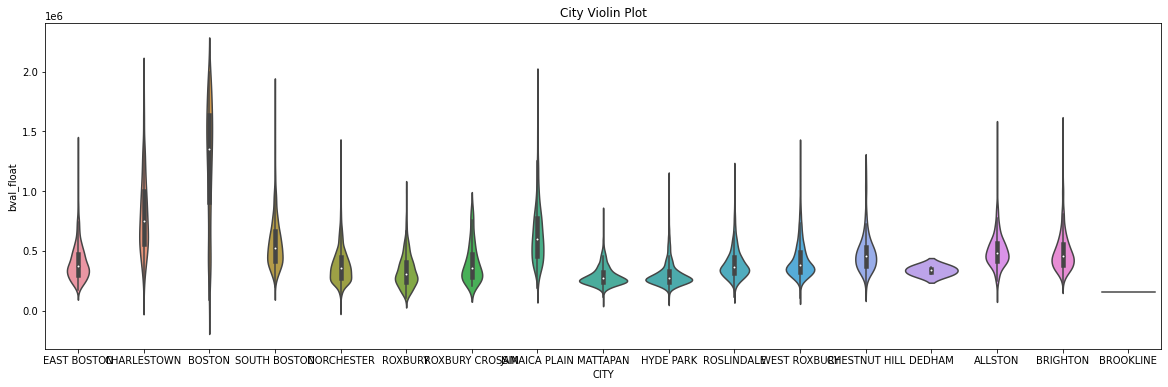

In [7]:
#EDA for regression
from matplotlib import pyplot as plt
import seaborn as sns



#violin plot
plt.figure(figsize=[20,6])

df3["bval_float"]=df3["BLDG_VALUE"].astype('int')
df3=df3[df3["bval_float"]<=2000000]
sns.violinplot(x="CITY",y="bval_float",data=df3).set_title("City Violin Plot")
plt.show()

In [8]:
# correlation heat map
corr=numcolumns.drop("BLDG_VALUE",axis=1).corr()
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(corr[(corr >=.7)|(corr <= -.4)],
            cmap='YlOrRd',vmax= 1.0,vmin= -1.0,linewidths= .1,annot=True,square=True);

ValueError: No variables found for grid columns.

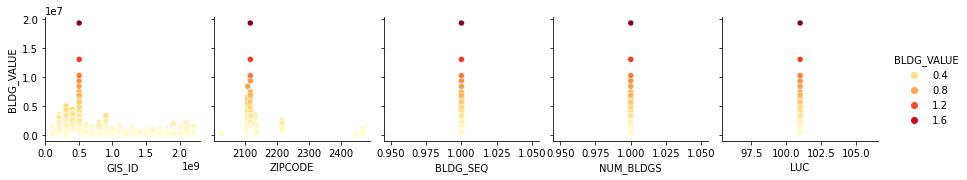

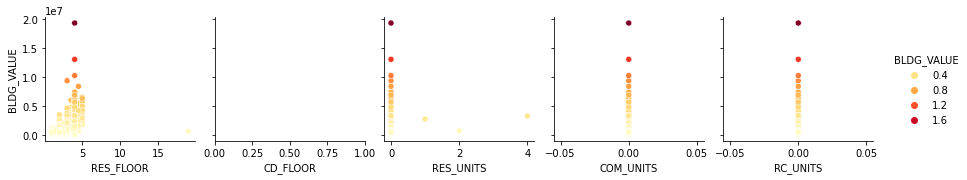

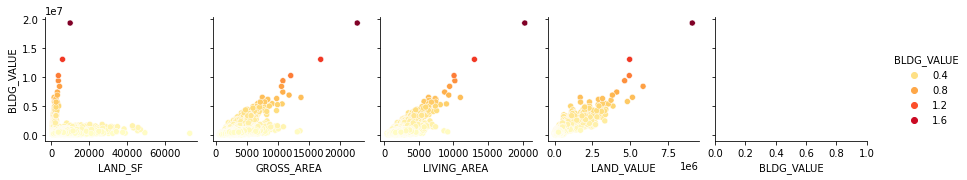

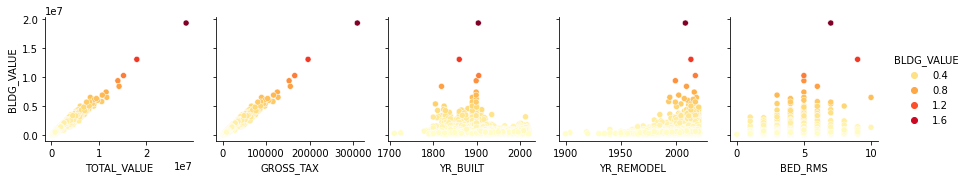

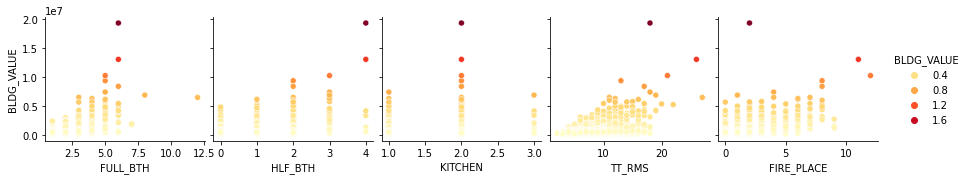

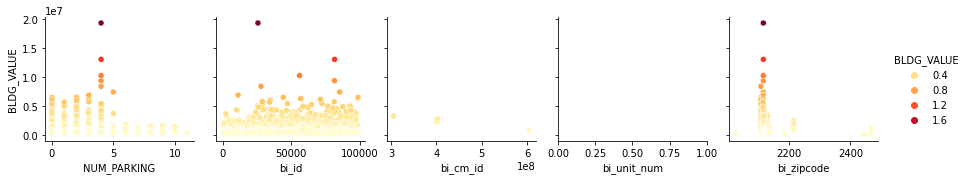

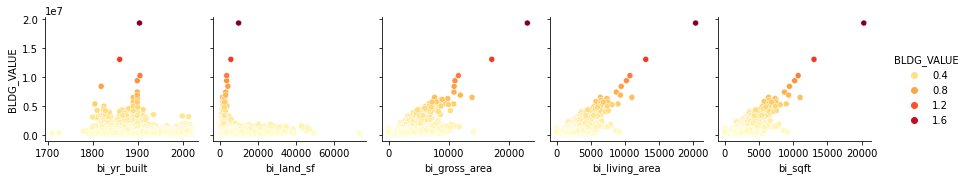

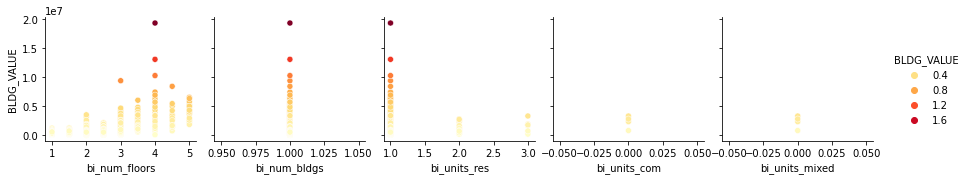

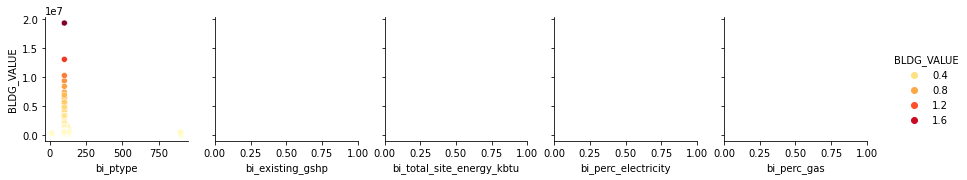

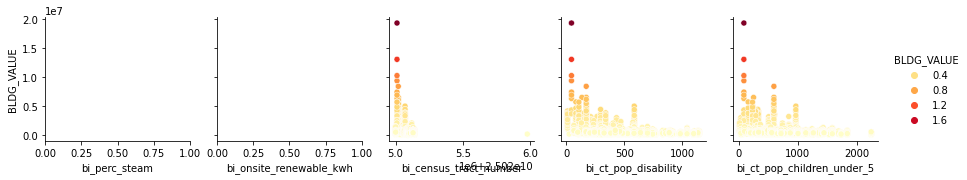

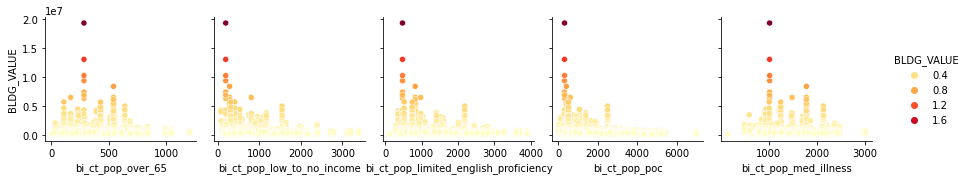

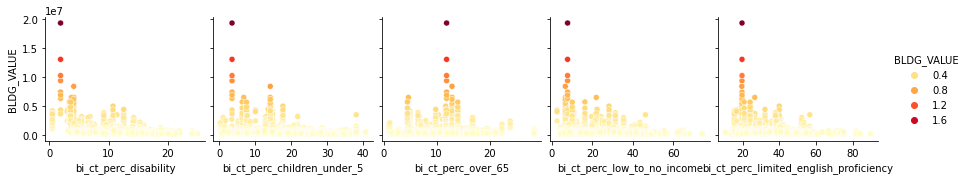

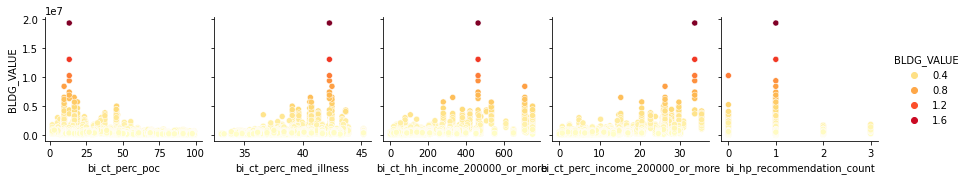

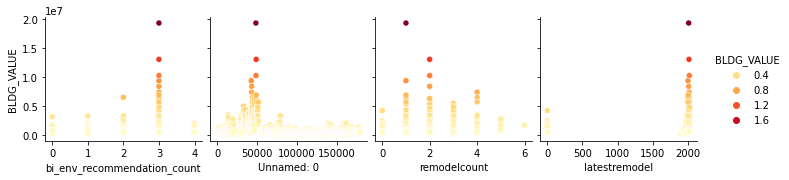

In [9]:
# pairplots
from matplotlib import pyplot as plt
import seaborn as sns
for i in range(0,len(numcolumns),5):
  sns.pairplot(numcolumns,y_vars=["BLDG_VALUE"],x_vars=numcolumns.columns[i:i+5],hue="BLDG_VALUE",palette="YlOrRd")   